Problem 1

Part A - Training Time: 0.11 seconds
Part A - Final Training Loss: 0.0121
Part A - Final Validation Loss: 0.0211
Part B - Training Time: 0.17 seconds
Part B - Final Training Loss: 0.0099
Part B - Final Validation Loss: 0.0168


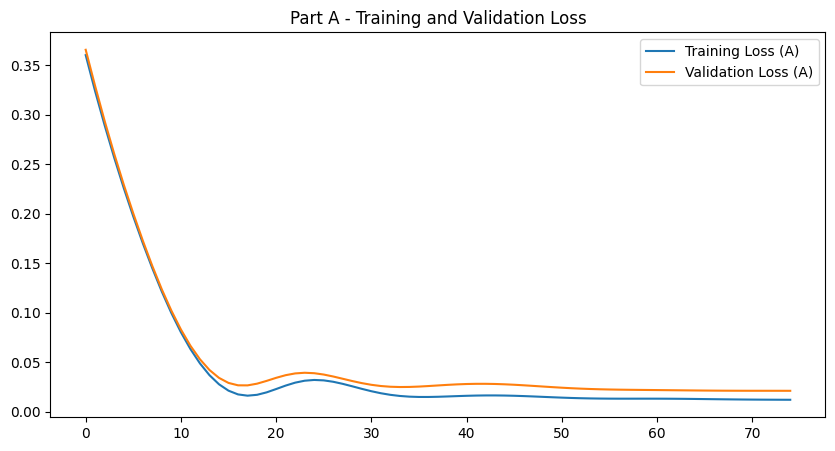

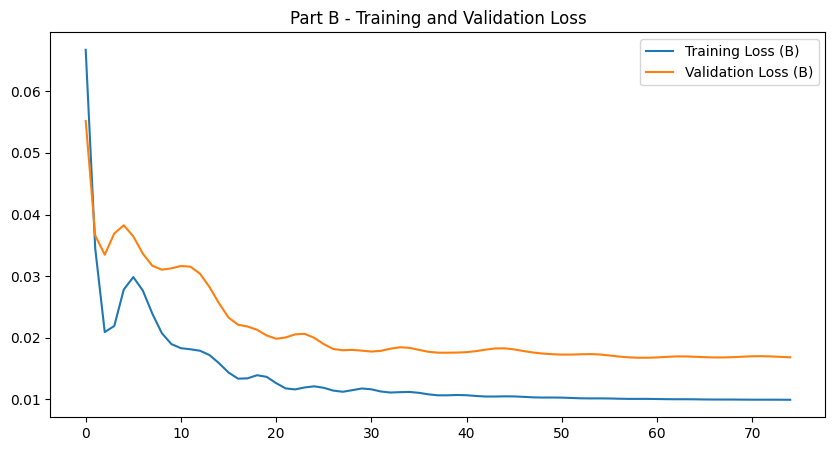

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

df = pd.read_csv('Housing.csv')  # Replace with your actual dataset path

# Select features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features].values
y = df['price'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = MinMaxScaler().fit_transform(y)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Part A: Single hidden layer neural network
class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 8)
        self.output = nn.Linear(8, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Training function
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=75):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val).item()
        val_losses.append(val_loss)
    return train_losses, val_losses

# Train Part A
start_time_a = time.time()
model_a = SingleLayerNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_a.parameters(), lr=0.01)
train_losses_a, val_losses_a = train_model(model_a, criterion, optimizer, X_train, y_train, X_val, y_val)
training_time_a = time.time() - start_time_a

print(f"Part A - Training Time: {training_time_a:.2f} seconds")
print(f"Part A - Final Training Loss: {train_losses_a[-1]:.4f}")
print(f"Part A - Final Validation Loss: {val_losses_a[-1]:.4f}")

# Part B: Extended network with three hidden layers
class MultiLayerNN(nn.Module):
    def __init__(self):
        super(MultiLayerNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 8)
        self.hidden2 = nn.Linear(8, 16)
        self.hidden3 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
    
    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Train Part B
start_time_b = time.time()
model_b = MultiLayerNN()
optimizer = optim.Adam(model_b.parameters(), lr=0.01)
train_losses_b, val_losses_b = train_model(model_b, criterion, optimizer, X_train, y_train, X_val, y_val)
training_time_b = time.time() - start_time_b

print(f"Part B - Training Time: {training_time_b:.2f} seconds")
print(f"Part B - Final Training Loss: {train_losses_b[-1]:.4f}")
print(f"Part B - Final Validation Loss: {val_losses_b[-1]:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_losses_a, label='Training Loss (A)')
plt.plot(val_losses_a, label='Validation Loss (A)')
plt.title('Part A - Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses_b, label='Training Loss (B)')
plt.plot(val_losses_b, label='Validation Loss (B)')
plt.title('Part B - Training and Validation Loss')
plt.legend()
plt.show()


Problem 2

Part A - Training Time: 0.18 seconds
Part A - Final Training Loss: 0.0254
Part A - Final Validation Loss: 0.0231
Part B - Training Time: 0.23 seconds
Part B - Final Training Loss: 0.0001
Part B - Final Validation Loss: 0.0001


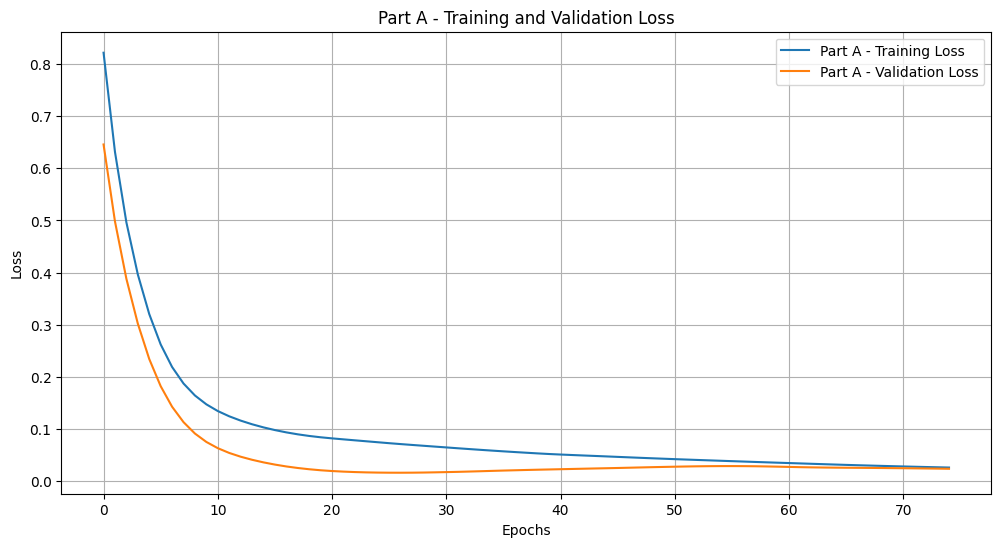

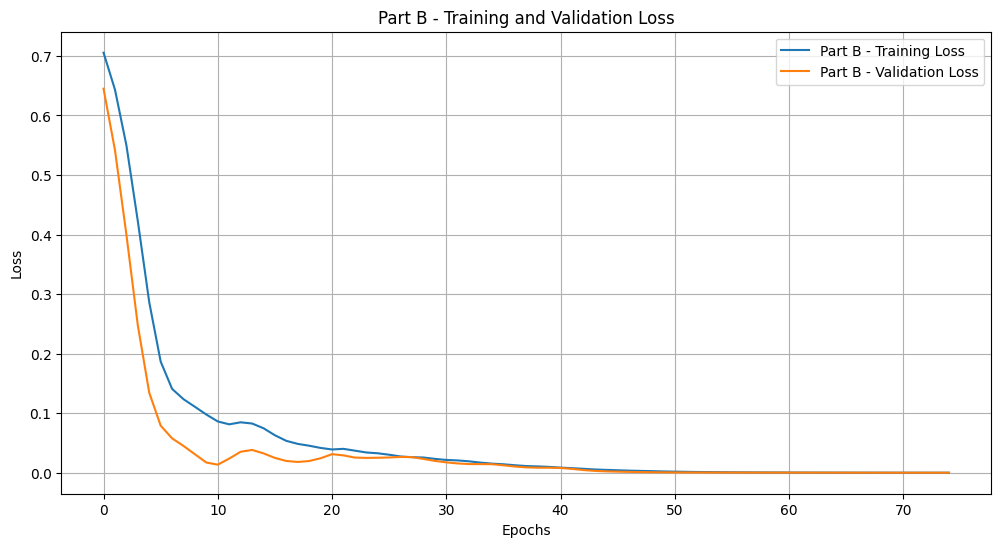

In [61]:
# Import necessary libraries
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=88)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

# Define the training function with validation loss tracking
num_epochs = 75

def train_model_with_loss(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()
            val_losses.append(val_loss)
    return train_losses, val_losses

# Part A: Neural Network with One Hidden Layer
class SingleLayerNN(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNN, self).__init__()
        self.hidden = nn.Linear(input_size, 32)  # One hidden layer with 32 nodes
        self.output = nn.Linear(32, 2)  # Output layer (2 classes: malignant or benign)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Initialize model, loss, and optimizer for Part A
input_size = X_train.shape[1]
model_a = SingleLayerNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_a.parameters(), lr=0.01)

# Train the model for Part A
start_time_a = time.time()
train_losses_a, val_losses_a = train_model_with_loss(model_a, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=num_epochs)
training_time_a = time.time() - start_time_a

print(f"Part A - Training Time: {training_time_a:.2f} seconds")
print(f"Part A - Final Training Loss: {train_losses_a[-1]:.4f}")
print(f"Part A - Final Validation Loss: {val_losses_a[-1]:.4f}")

# Part B: Neural Network with Three Hidden Layers
class MultiLayerNN(nn.Module):
    def __init__(self, input_size):
        super(MultiLayerNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, 32)
        self.hidden2 = nn.Linear(32, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 2)  # Output layer (2 classes: malignant or benign)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Initialize model, loss, and optimizer for Part B
model_b = MultiLayerNN(input_size)
optimizer_b = optim.Adam(model_b.parameters(), lr=0.01)

# Train the model for Part B
start_time_b = time.time()
train_losses_b, val_losses_b = train_model_with_loss(model_b, criterion, optimizer_b, X_train, y_train, X_val, y_val, epochs=num_epochs)
training_time_b = time.time() - start_time_b

print(f"Part B - Training Time: {training_time_b:.2f} seconds")
print(f"Part B - Final Training Loss: {train_losses_b[-1]:.4f}")
print(f"Part B - Final Validation Loss: {val_losses_b[-1]:.4f}")

# Plot training and validation loss for both parts
# Part A
plt.figure(figsize=(12, 6))
plt.plot(train_losses_a, label="Part A - Training Loss")
plt.plot(val_losses_a, label="Part A - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Part A - Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Part B
plt.figure(figsize=(12, 6))
plt.plot(train_losses_b, label="Part B - Training Loss")
plt.plot(val_losses_b, label="Part B - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Part B - Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


Problem 3

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/100, Training Loss: 1.9410, Validation Loss: 1.7188
Epoch 2/100, Training Loss: 1.8345, Validation Loss: 1.6509
Epoch 3/100, Training Loss: 1.7986, Validation Loss: 1.6484
Epoch 4/100, Training Loss: 1.7837, Validation Loss: 1.6275
Epoch 5/100, Training Loss: 1.7667, Validation Loss: 1.6252
Epoch 6/100, Training Loss: 1.7511, Validation Loss: 1.6949
Epoch 7/100, Training Loss: 1.7534, Validation Loss: 1.6342
Epoch 8/100, Training Loss: 1.7398, Validation Loss: 1.6189
Epoch 9/100, Training Loss: 1.7345, Validation Loss: 1.6569
Epoch 10/100, Training Loss: 1.7284, Validation Loss: 1.5880
Epoch 11/100, Training Loss: 1.7286, Validation Loss: 1.6387
Epoch 12/100, Training Loss: 1.7245, Validation Loss: 1.6347
Epoch 13/100, Training Loss: 1.7167, Validation Loss: 1.5663
Epoch 14/100, Training Loss: 1.7169, Validation Loss: 1.6243
Epoch 15/100, Training Loss: 1.7088, Validation Loss: 1.5817
Epoch 16/100, Trai

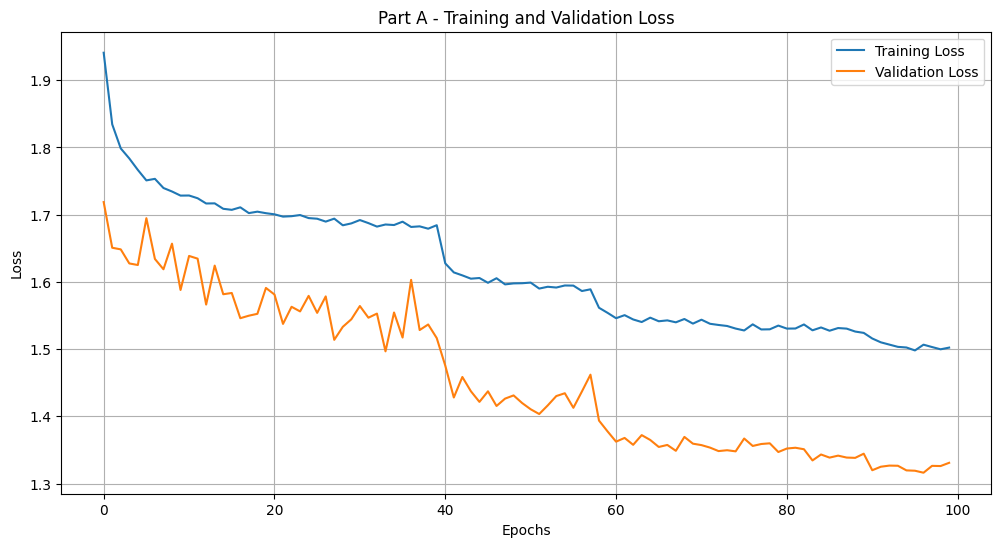

In [65]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset with augmentations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Helper function for training
def train_model_with_loss(model, criterion, optimizer, scheduler, train_loader, test_loader, epochs=100):
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.view(inputs.size(0), -1), targets

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.view(inputs.size(0), -1), targets
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Adjust learning rate
        scheduler.step(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    training_time = time.time() - start_time
    return train_losses, val_losses, training_time

# Part A: Single Hidden Layer Neural Network with Dropout
class SingleHiddenLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SingleHiddenLayerNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

# Initialize model, loss, optimizer, and scheduler for Part A
input_size = 32 * 32 * 3
hidden_size = 256
output_size = 10

model_a = SingleHiddenLayerNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_a.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Train the model for Part A
train_losses_a, val_losses_a, training_time_a = train_model_with_loss(model_a, criterion, optimizer, scheduler, train_loader, test_loader)

print(f"Part A - Training Time: {training_time_a:.2f} seconds")
print(f"Part A - Final Training Loss: {train_losses_a[-1]:.4f}")
print(f"Part A - Final Validation Loss: {val_losses_a[-1]:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_losses_a, label="Training Loss")
plt.plot(val_losses_a, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Part A - Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/100, Training Loss: 1.9123, Validation Loss: 1.6997
Epoch 2/100, Training Loss: 1.7602, Validation Loss: 1.6232
Epoch 3/100, Training Loss: 1.6957, Validation Loss: 1.5727
Epoch 4/100, Training Loss: 1.6547, Validation Loss: 1.5583
Epoch 5/100, Training Loss: 1.6226, Validation Loss: 1.5416
Epoch 6/100, Training Loss: 1.6016, Validation Loss: 1.5352
Epoch 7/100, Training Loss: 1.5818, Validation Loss: 1.5194
Epoch 8/100, Training Loss: 1.5634, Validation Loss: 1.5244
Epoch 9/100, Training Loss: 1.5556, Validation Loss: 1.4963
Epoch 10/100, Training Loss: 1.5419, Validation Loss: 1.4995
Epoch 11/100, Training Loss: 1.5350, Validation Loss: 1.5010
Epoch 12/100, Training Loss: 1.5270, Validation Loss: 1.4740
Epoch 13/100, Training Loss: 1.5159, Validation Loss: 1.4802
Epoch 14/100, Training Loss: 1.5113, Validation Loss: 1.4643
Epoch 15/100, Training Loss: 1.5052, Validation Loss: 1.4693
Epoch 16/100, Trai

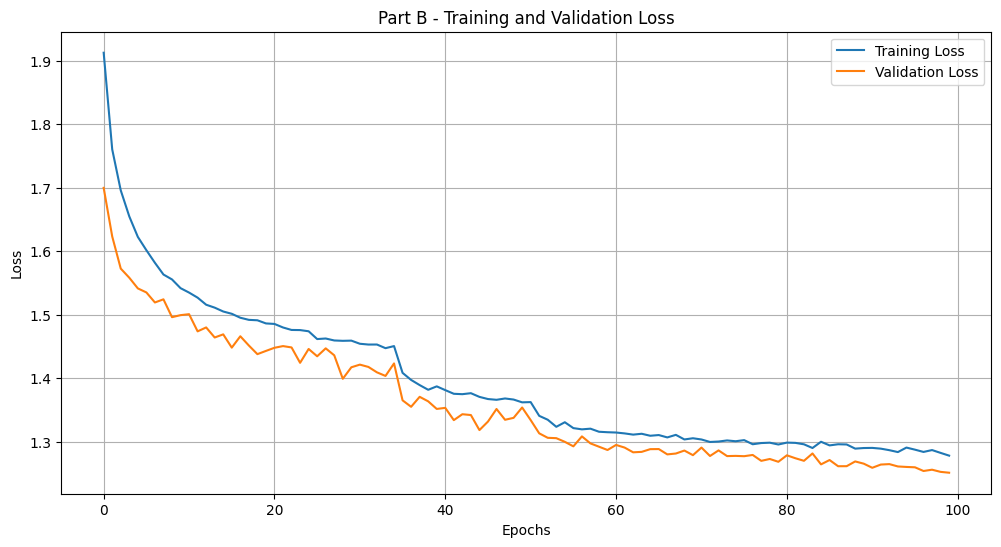

In [66]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset with augmentations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Helper function for training
def train_model_with_loss(model, criterion, optimizer, scheduler, train_loader, test_loader, epochs=100):
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.view(inputs.size(0), -1), targets

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.view(inputs.size(0), -1), targets
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Adjust learning rate
        scheduler.step(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    training_time = time.time() - start_time
    return train_losses, val_losses, training_time

# Part B: Multi Hidden Layer Neural Network with Dropout
class MultiHiddenLayerNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MultiHiddenLayerNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.hidden3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.output = nn.Linear(hidden_sizes[2], output_size)
        self.dropout = nn.Dropout(0.5)
        self.leaky_relu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = self.dropout(torch.relu(self.hidden2(x)))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Initialize model, loss, optimizer, and scheduler for Part B
input_size = 32 * 32 * 3
hidden_sizes = [256, 128, 64]
output_size = 10

model_b = MultiHiddenLayerNN(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer_b = optim.Adam(model_b.parameters(), lr=0.001, weight_decay=1e-4)
scheduler_b = optim.lr_scheduler.ReduceLROnPlateau(optimizer_b, mode='min', factor=0.5, patience=5, verbose=True)

# Train the model for Part B
train_losses_b, val_losses_b, training_time_b = train_model_with_loss(model_b, criterion, optimizer_b, scheduler_b, train_loader, test_loader)

print(f"Part B - Training Time: {training_time_b:.2f} seconds")
print(f"Part B - Final Training Loss: {train_losses_b[-1]:.4f}")
print(f"Part B - Final Validation Loss: {val_losses_b[-1]:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_losses_b, label="Training Loss")
plt.plot(val_losses_b, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Part B - Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()
